In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_train = pd.read_csv("/kaggle/input/titanic/train.csv")
raw_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Converting all cabins number to their floor code**

In [5]:
raw_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
raw_train_drop = raw_train.copy()
raw_test_drop = raw_test.copy()

def replace_cabin(cabin_col):
    if(pd.isnull(cabin_col)):
        return 0
    else:
        return cabin_col[0]

raw_train_drop["Floor Code"] = raw_train_drop["Cabin"].apply(replace_cabin)
raw_test_drop["Floor Code"] = raw_test_drop["Cabin"].apply(replace_cabin)

In [7]:
raw_train_drop["Floor Code"].unique()

array([0, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

**Replacing the NAN values with the unique value with max appearance**

In [8]:
raw_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
comb = pd.concat((raw_train_drop, raw_test_drop), axis=0)
vc = comb["Embarked"].value_counts()
raw_train_drop["Embarked"].replace(np.nan, vc.idxmax(), inplace=True)
raw_test_drop["Embarked"].replace(np.nan, vc.idxmax(), inplace=True)

**Replacing missing age with average age for train data and Fare for test data**

In [10]:
comb = pd.concat((raw_train_drop, raw_test_drop), axis=0)

age_mean = comb["Age"].mean()
raw_train_drop["Age"].replace(np.nan, age_mean, inplace=True)
raw_test_drop["Age"].replace(np.nan, age_mean, inplace=True)

fare_mean = comb["Fare"].mean()
raw_test_drop["Fare"].replace(np.nan, fare_mean, inplace=True)

**Dropped Unnecssary Column**

In [11]:
cols_to_drop = ["Name","Ticket","Cabin"]
raw_train_drop.drop(columns=cols_to_drop,inplace=True)
raw_test_drop.drop(columns=cols_to_drop,inplace=True)

raw_train_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Floor Code
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,0


**Replacing Sex, Embarked and Floor Code Columns with numbers**

In [12]:
columns_encode = {}
columns_encode["Sex"] = [["male","female"],[0,1]]
columns_encode["Embarked"] = [["S","C","Q"],[0,1,2]]
columns_encode["Floor Code"] = [["A","B","C","D","E","F","G","T"],[1,2,3,4,5,6,7,8]]

columns = ["Sex","Embarked","Floor Code"]

for column in columns:
    raw_train_drop[column].replace(columns_encode[column][0], columns_encode[column][1], inplace=True)
    raw_test_drop[column].replace(columns_encode[column][0], columns_encode[column][1], inplace=True)

In [13]:
raw_train_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Floor Code
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,3
4,5,0,3,0,35.0,0,0,8.0500,0,0


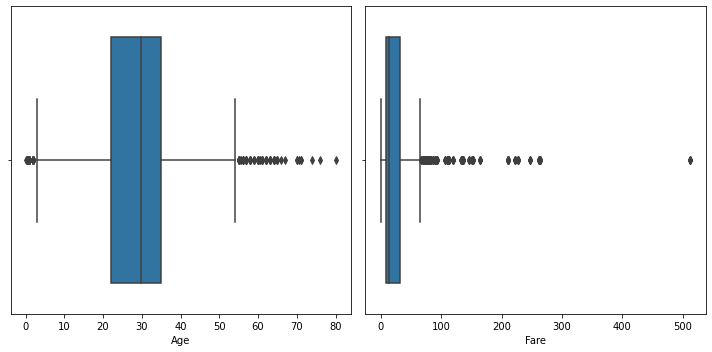

In [14]:
pd_all_data = pd.concat((raw_train_drop, raw_test_drop), axis=0)
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=pd_all_data, x="Age", ax=axes[0])
sns.boxplot(data=pd_all_data, x="Fare", ax=axes[1])
plt.tight_layout()
plt.show()

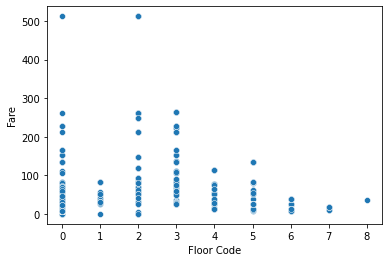

In [15]:
sns.scatterplot(data=pd_all_data, x="Floor Code", y="Fare")
plt.show()

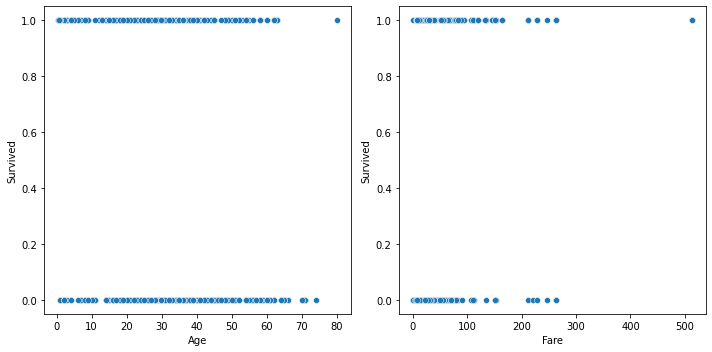

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=pd_all_data, x="Age", y="Survived", ax=axes[0])
sns.scatterplot(data=pd_all_data, x="Fare", y="Survived", ax=axes[1])
plt.tight_layout()
plt.show()

In [17]:
pd_all_data[["Survived","Age","Fare"]].corr()

,Survived,Age,Fare
Survived,1.000000,-0.070323,0.257307
Age,-0.070323,1.000000,0.171521
Fare,0.257307,0.171521,1.000000


**With the poor correlation value between Survived and Age, I dropped the Age column**

In [18]:
cols_to_drop = ["Age"]
raw_train_drop.drop(columns=cols_to_drop,inplace=True)
raw_test_drop.drop(columns=cols_to_drop,inplace=True)

raw_train_drop.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Floor Code
0,1,0,3,0,1,0,7.2500,0,0
1,2,1,1,1,1,0,71.2833,1,3
2,3,1,3,1,0,0,7.9250,0,0
3,4,1,1,1,1,0,53.1000,0,3
4,5,0,3,0,0,0,8.0500,0,0


**Applying one hot encoding to the categorical nominal variables and standard scaler to numeric data**

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [20]:
raw_train_drop.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Floor Code'],
      dtype='object')

In [21]:
onehot = OneHotEncoder()
scaler = StandardScaler()

nominal_cols = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Floor Code']
other_cols = ['Fare']

pd_all_data = pd.concat((raw_train_drop, raw_test_drop), axis=0)

onehot.fit(pd_all_data[nominal_cols])
scaler.fit(pd_all_data[other_cols])

StandardScaler()

In [22]:
raw_test_drop.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Floor Code     0
dtype: int64

In [23]:
def get_selected_data(pd_data):
    nominal_col_feature = onehot.transform(pd_data[nominal_cols]).toarray()
    other_col_feature = scaler.transform(pd_data[other_cols])
    x = np.concatenate((nominal_col_feature,  other_col_feature),axis=1)
    y = raw_train_drop["Survived"]
    return x,y

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,y_train = get_selected_data(raw_train_drop)
x_test,_ = get_selected_data(raw_test_drop)

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

In [26]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, f1_score

In [27]:
def checkValidation(y_valid, y_valid_pred):
    f1_scr = f1_score(y_valid, y_valid_pred, average='weighted')
    jc_scr = jaccard_score(y_valid, y_valid_pred,pos_label=0)
    
    return jc_scr, f1_scr

In [28]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Survive', 'Survived']); ax.yaxis.set_ticklabels(['Not Survive', 'Survived'])

In [29]:
summary_prediction = [];

In [30]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['liblinear']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters,cv=10)
logreg_cv.fit(x_train_split,y_train_split)
pred = logreg_cv.predict(x_val_split)
jc_scr, f1_scr = checkValidation(y_val_split, pred)
summary_prediction.append(['Logistics Regression',jc_scr, f1_scr])
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.7878912363067293


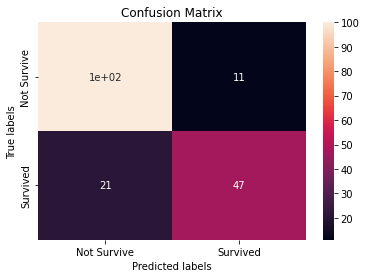

In [31]:
yhatl=logreg_cv.predict(x_val_split)
plot_confusion_matrix(y_val_split,yhatl)

In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters,cv=10)
tree_cv.fit(x_train_split,y_train_split)
pred = tree_cv.predict(x_val_split)
jc_scr, f1_scr = checkValidation(y_val_split, pred)
summary_prediction.append(['Decision Tree',jc_scr, f1_scr])
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.80481220657277


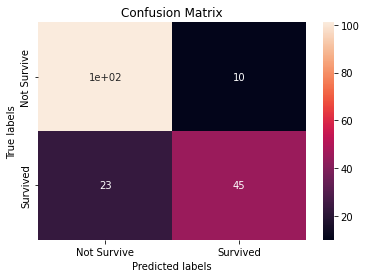

In [33]:
yhatt=tree_cv.predict(x_val_split)
plot_confusion_matrix(y_val_split,yhatt)

In [34]:
parameters = {'n_neighbors': [n for n in range(1,20)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters,cv=10)
knn_cv.fit(x_train_split,y_train_split)
pred = knn_cv.predict(x_val_split)
jc_scr, f1_scr = checkValidation(y_val_split, pred)
summary_prediction.append(['K Nearest Neighbor',jc_scr, f1_scr])
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'kd_tree', 'n_neighbors': 17, 'p': 1}
accuracy : 0.7920970266040689


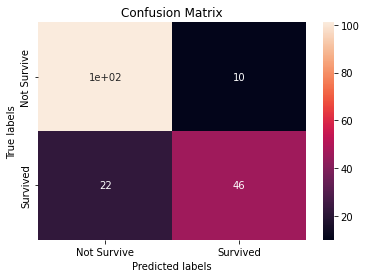

In [35]:
yhatk=knn_cv.predict(x_val_split)
plot_confusion_matrix(y_val_split,yhatk)

In [36]:
svm = SVC()
svm.fit(x_train_split,y_train_split)
pred = svm.predict(x_val_split)
jc_scr, f1_scr = checkValidation(y_val_split, pred)
summary_prediction.append(['Support Vector Machine',jc_scr, f1_scr])

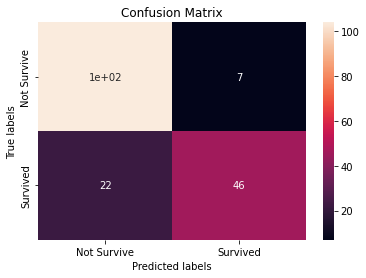

In [37]:
yhats=svm.predict(x_val_split)
plot_confusion_matrix(y_val_split,yhats)

In [38]:
pd_summary_prediction = pd.DataFrame(data=summary_prediction, columns=['method','jaccard_score','f1_score'])
pd_summary_prediction.set_index('method', inplace=True)
pd_summary_prediction.head()

,jaccard_score,f1_score
method,,
Logistics Regression,0.757576,0.817988
Decision Tree,0.753731,0.810999
K Nearest Neighbor,0.759398,0.817163
Support Vector Machine,0.781955,0.833074


In [39]:
selected_model = SVC()
selected_model.fit(x_train, y_train)

SVC()

In [40]:
numerical_feature = selected_model.predict(x_test)
data_test_predict = raw_test.copy()
data_test_predict['Survived'] = numerical_feature
data_test_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [41]:
submission = data_test_predict[['PassengerId', 'Survived']]
submission.to_csv('./submission.csv', index=False)